The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


"plt.plot(train_loss_2000[0], train_loss_2000[1], label = '1',color='r')\nplt.plot(train_loss_100000[0], train_loss_100000[1], label = '2',color='b', linestyle='dashed')\nplt.ylabel('train_loss')\nplt.legend()\nplt.show()\n\nplt.plot(val_loss_2000[0], val_loss_2000[1], label = 'val_loss, ds1',color='r')\nplt.plot(train_loss_2000[0], train_loss_2000[1], label = 'train_loss, ds1',color='r', linewidth=1.5)\nplt.plot(val_loss_100000[0], val_loss_100000[1], label = 'val_loss, ds2',color='b', linestyle='dashed')\nplt.plot(train_loss_100000[0], train_loss_100000[1], label = 'train_loss, ds2',color='b', linestyle='dashed', linewidth=1.5)\nplt.ylabel('val_loss')\nplt.legend()\nplt.show()\n\nplt.plot(val_loss_2000[0], val_loss_2000[1], label = 'val_loss, ds1',color='r')\nplt.plot(train_loss_2000[0], train_loss_2000[1], label = 'train_loss, ds1',color='r', linewidth=1.5)\nplt.ylabel('val_loss')\nplt.legend()\nplt.show()\n\nplt.plot(val_loss_100000[0], val_loss_100000[1], label = 'val_loss, ds2',c

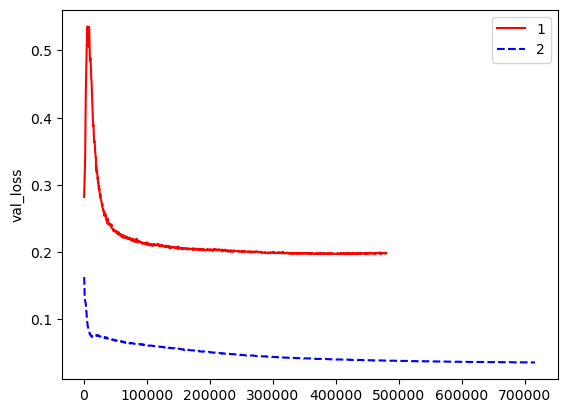

In [1]:
################################################################################
################################################################################
###                                  Рисунок 3                               ###
################################################################################
################################################################################
import numpy as np
from matplotlib import pyplot as plt

def get_val_from_files(filename):
    dtype1 = np.dtype([('Wall type', 'float64'), ('Step', 'int32'), ('Value', 'float64')])
    val_energy = np.loadtxt(filename, delimiter=',', dtype = dtype1, skiprows =1)
    val_energy_np = np.array(list(map(list,val_energy))).transpose()
    return([val_energy_np[1], val_energy_np[2]])
    
val_loss_2000 = get_val_from_files('./learning_curves/2000_val.csv')
val_loss_100000 = get_val_from_files('./learning_curves/100000_val.csv')

train_loss_2000 = get_val_from_files('./learning_curves/2000_train.csv')
train_loss_100000 = get_val_from_files('./learning_curves/100000_train.csv')

plt.plot(val_loss_2000[0], val_loss_2000[1], label = '1',color='r')
plt.plot(val_loss_100000[0], val_loss_100000[1], label = '2',color='b', linestyle='dashed')
plt.ylabel('val_loss')
plt.legend()
plt.savefig('val_loss.png',dpi=150)
plt.savefig('val_loss.eps',dpi=150)

"""plt.plot(train_loss_2000[0], train_loss_2000[1], label = '1',color='r')
plt.plot(train_loss_100000[0], train_loss_100000[1], label = '2',color='b', linestyle='dashed')
plt.ylabel('train_loss')
plt.legend()
plt.show()

plt.plot(val_loss_2000[0], val_loss_2000[1], label = 'val_loss, ds1',color='r')
plt.plot(train_loss_2000[0], train_loss_2000[1], label = 'train_loss, ds1',color='r', linewidth=1.5)
plt.plot(val_loss_100000[0], val_loss_100000[1], label = 'val_loss, ds2',color='b', linestyle='dashed')
plt.plot(train_loss_100000[0], train_loss_100000[1], label = 'train_loss, ds2',color='b', linestyle='dashed', linewidth=1.5)
plt.ylabel('val_loss')
plt.legend()
plt.show()

plt.plot(val_loss_2000[0], val_loss_2000[1], label = 'val_loss, ds1',color='r')
plt.plot(train_loss_2000[0], train_loss_2000[1], label = 'train_loss, ds1',color='r', linewidth=1.5)
plt.ylabel('val_loss')
plt.legend()
plt.show()

plt.plot(val_loss_100000[0], val_loss_100000[1], label = 'val_loss, ds2',color='b', linestyle='dashed')
plt.plot(train_loss_100000[0], train_loss_100000[1], label = 'train_loss, ds2',color='b', linestyle='dashed', linewidth=1.5)
plt.ylabel('val_loss')
plt.legend()
plt.show()"""

In [5]:
################################################################################
################################################################################
###                                  Рисунки 4, 5                            ###
################################################################################
################################################################################
import numpy as np
from matplotlib import pyplot as plt

# исходные данные для обучения
lst_original_data_all_by_atoms_100000=np.load('lst_original_data_all_by_atoms_100000.npy')
# данные, вычисляемые моделью, обученной на 2000 записях
lst_model_data_all_by_atoms_2000=np.load('lst_model_data_all_by_atoms_2000.npy')
# данные, вычисляемые моделью, обученной на 100000 записях
lst_model_data_all_by_atoms_100000=np.load('lst_model_data_all_by_atoms_100000.npy')

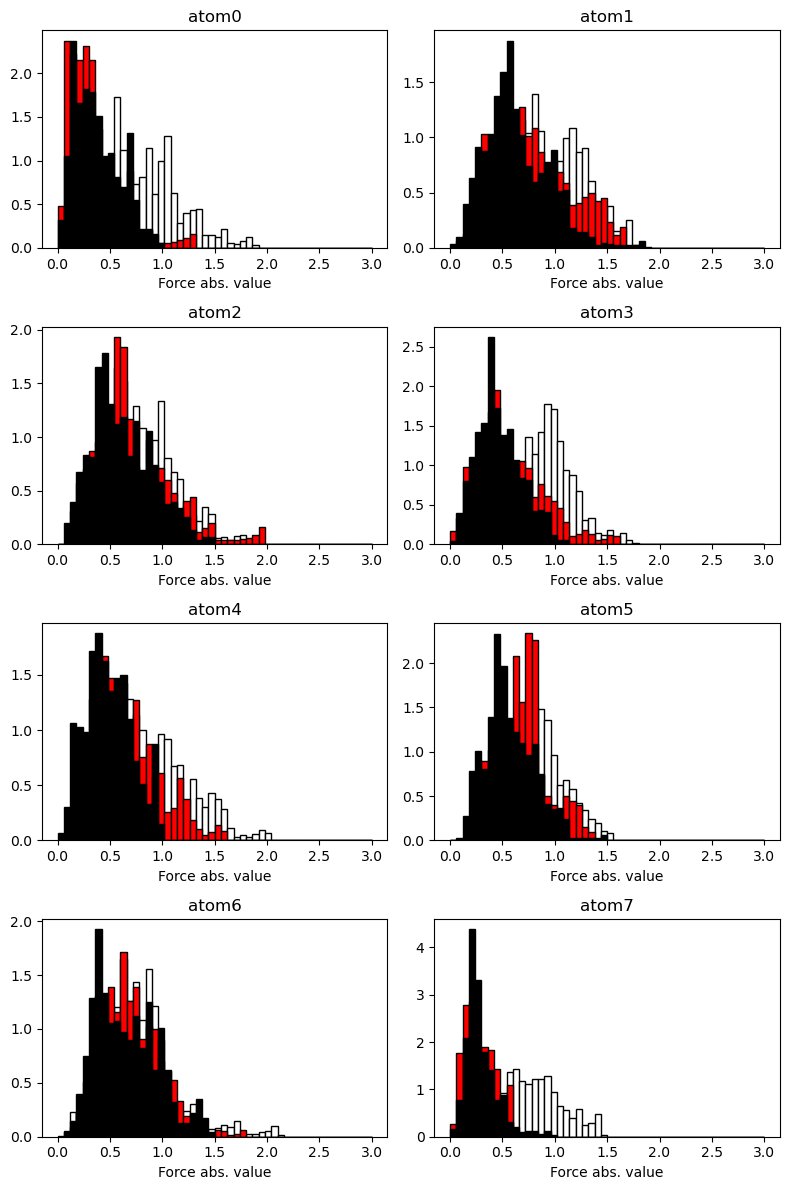

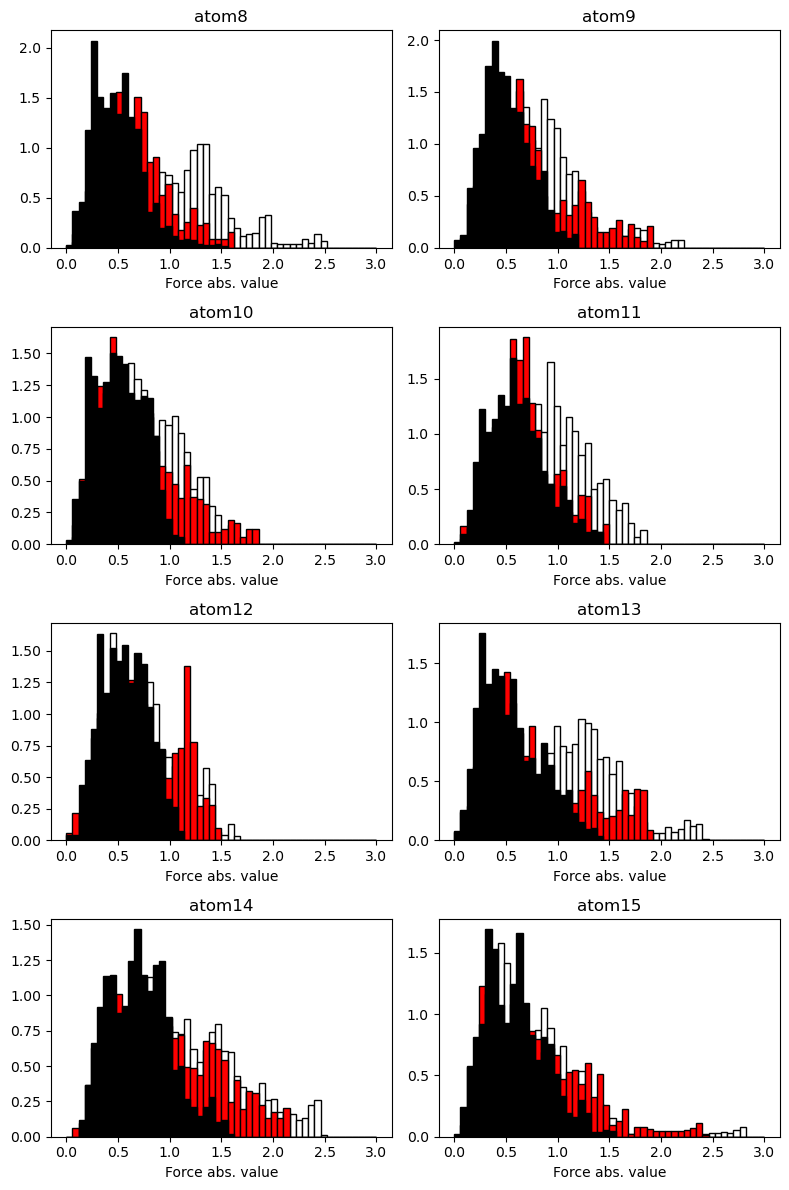

In [6]:
plt.rcParams.update({'font.size': 10})
# строим гистограммы модулей сил, действующих на каждый атом в отдельности
# используем нормировку такую, что площадь под гистограммой равна 1
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8, 12))

for i in range(4):
    for j in range(2):
        axes[i][j].hist(lst_original_data_all_by_atoms_100000[i*2+j], bins=50, range = (0, 3), color='white', edgecolor='black',density=True)        
        axes[i][j].hist(lst_model_data_all_by_atoms_100000[i*2+j], bins=50, range = (0, 3), color='red', edgecolor='black',density=True)
        axes[i][j].hist(lst_model_data_all_by_atoms_2000[i*2+j], bins=50, range = (0, 3), color='black', edgecolor='black',density=True)
        axes[i][j].set_title('atom'+str(i*2+j))
 
# Adding labels and title
for i in range(4):
    for j in range(2):
        axes[i][j].set_xlabel('Force abs. value')
        #axes[i][j].set_ylabel('Frequency')
 
# Adjusting layout for better spacing
plt.tight_layout()
 
# Display the figure
#plt.show()

plt.savefig('force_abs_values_by_atoms1.png',dpi=150)
plt.savefig('force_abs_values_by_atoms1.eps',dpi=150)

# строим гистограммы модулей сил, действующих на каждый атом в отдельности
# используем нормировку такую, что площадь под гистограммой равна 1
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8, 12))

for i in range(4):
    for j in range(2):
        axes[i][j].hist(lst_original_data_all_by_atoms_100000[i*2+j+8], bins=50, range = (0, 3), color='white', edgecolor='black',density=True)
        axes[i][j].hist(lst_model_data_all_by_atoms_100000[i*2+j+8], bins=50, range = (0, 3), color='red', edgecolor='black',density=True)
        axes[i][j].hist(lst_model_data_all_by_atoms_2000[i*2+j+8], bins=50, range = (0, 3), color='black', edgecolor='black',density=True)        
        axes[i][j].set_title('atom'+str(i*2+j+8))
 
# Adding labels and title
for i in range(4):
    for j in range(2):
        axes[i][j].set_xlabel('Force abs. value')
        #axes[i][j].set_ylabel('Frequency')
 
# Adjusting layout for better spacing
plt.tight_layout()
 
# Display the figure
#plt.show()

plt.savefig('force_abs_values_by_atoms2.png',dpi=150)
plt.savefig('force_abs_values_by_atoms2.eps',dpi=150)

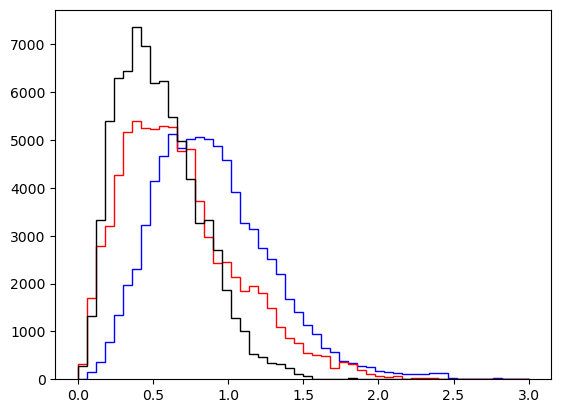

In [7]:
################################################################################
################################################################################
###                                  Рисунок 6                               ###
################################################################################
################################################################################
# строим гистограммы усредненных модулей сил, действующих на атом
lst_original_data_all_100000=lst_original_data_all_by_atoms_100000.reshape(5000*16)
lst_model_data_all_100000=lst_model_data_all_by_atoms_100000.reshape(5000*16)
lst_model_data_all_2000=lst_model_data_all_by_atoms_2000.reshape(5000*16)

plt.hist(lst_original_data_all_100000, bins=50, range = (0, 3), color='white', edgecolor='blue', histtype='step', stacked=True, fill=False)
plt.hist(lst_model_data_all_100000, bins=50, range = (0, 3), color='white', edgecolor='red', histtype='step', stacked=True, fill=False)
plt.hist(lst_model_data_all_2000, bins=50, range = (0, 3), color='white', edgecolor='black', histtype='step', stacked=True, fill=False)
#plt.show()

#lst_data=np.transpose([lst_original_data_all_100000, lst_model_data_all_100000])
#plt.hist(lst_data, bins=50, histtype='step', range = (0, 3), color=['blue','red'], label=['AIMD','model'])
#plt.legend(prop={'size': 10})
#plt.show()
plt.savefig('force_abs_values.png')

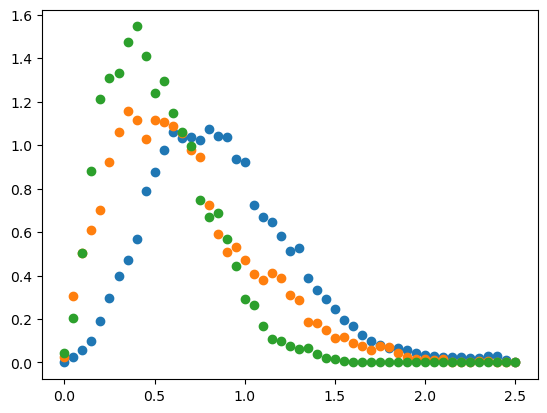

In [9]:
# полученные выше гистограммы плохо читаются в черно-белом формате
numBin = 50
maxValue = 2.5

# функция, формирующая гистограмму (с учетом нормировки)
def hist_from_list(lst, numBin, maxValue):
    lstMax = np.max(lst)
    lstMin = np.min(lst)
    lstLen = len(lst)
    binEdges = np.linspace(0,maxValue,numBin+1)
    lstSorted = np.sort(lst)
    lstBinNumber= np.zeros(numBin+1)
    j = 0
    for i in range(numBin):
        if j == lstLen:
            break
        while lstSorted[j] < binEdges[i+1]:
            lstBinNumber[i] = lstBinNumber[i] + 1
            j = j + 1
            if j == lstLen:
                break
    # нормировка, чтобы площадь под кривой была равна 1
    lstBinNumber = lstBinNumber/(lstLen*maxValue/numBin)
    return([binEdges,lstBinNumber])

hist_100000_original = hist_from_list(lst_original_data_all_100000, numBin, maxValue)
hist_100000_model = hist_from_list(lst_model_data_all_100000, numBin, maxValue)
hist_2000_model = hist_from_list(lst_model_data_all_2000, numBin, maxValue)
#np.sum(hist_2000_model[1] * maxValue/numBin)

from matplotlib import pyplot as plt
plt.scatter(hist_100000_original[0], hist_100000_original[1])
plt.scatter(hist_100000_model[0], hist_100000_model[1])
plt.scatter(hist_2000_model[0], hist_2000_model[1])
plt.show()

In [11]:
# сглаживаем кривые распределения абсолютных значений сил

from scipy.special import factorial
from scipy.optimize import curve_fit

# модель
def gauss(x,a,b,c):
    return a*np.exp(-(x-b)**2/c**2)

popt100000original, pcov100000original = curve_fit(gauss, hist_100000_original[0], hist_100000_original[1])
popt100000model, pcov100000model = curve_fit(gauss, hist_100000_model[0], hist_100000_model[1])
popt2000model, pcov2000model = curve_fit(gauss, hist_2000_model[0], hist_2000_model[1])
#print(popt100000original)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


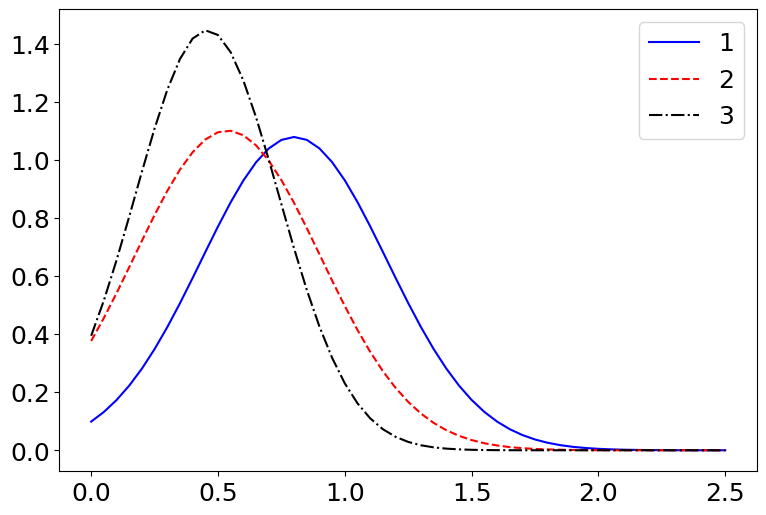

In [13]:
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(9, 6))

plt.plot(hist_100000_original[0], gauss(hist_100000_original[0], *popt100000original), 'b-',label='1')
#plt.scatter(hist_100000_original[0], hist_100000_original[1],color ='b',marker='.')
plt.plot(hist_100000_model[0], gauss(hist_100000_model[0], *popt100000model), 'r--',label='2')
#plt.scatter(hist_100000_model[0], hist_100000_model[1],color ='r',marker='v')
plt.plot(hist_2000_model[0], gauss(hist_2000_model[0], *popt2000model), 'k-.',label='3')
#plt.scatter(hist_2000_model[0], hist_2000_model[1],color ='k',marker='*')
plt.legend(loc='upper right',fontsize=18)
plt.savefig('force_abs_values_fit.eps')
plt.savefig('force_abs_values_fit.png')